# Time Series

In [3]:
from fastcore.all import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import timedelta

In [2]:
path = Path('../data')

## Overview

Imagine you have a spreadsheet. In the first column you write a bunch of dates. In the second column you write down anything else. You have a time series. Usually the dates are ordered. It is helpful if the second column is meaningful. 

Time series data is extremely common. Daily temperatures, stock prices, ... . Because these are so common all sorts of techniques have been developed to analyze them. Different analysis tools have different uses and vocabulary to articulate where and when these tools work was created.

This chapter will cover ARIMA (Auto Regrissive Integrated Moving Average), Kalman filters, and particle filters. 

## Intuition

Let us imagine that every day we stand on a scale and measure our weight. 

If you are on a diet maybe that number gets smaller. If you fall off the diet every day that number gets bigger. We call these trending. There is an overall directionality of the measurement. 

If we look at a larger time range. Maybe there is weight gain in the winter due to holiday binging and weight loss during the summer so you look good at the beach. This is seasonal data. More generally if we see regular cycles of ups and downs it is periodic. 

Finally you could be relatively stable. Some days you weigh a little more some days a little less. Maybe you weighed yourself in the morning vs the evening. Maybe you just had a big meal. These are stochastic.  

These crude descriptions are the first step in time series analysis. If you can describe in accurate enough detail the price of a stock it is considered a "model". If you can describe how a stock price changes over time this information will be helpful when trying to make a buy or sell decision. 

### Belief

### Hypothesis

## The Data

### Load data

In [11]:
raw = pd.read_csv(path/'eod-quotemedia.csv',parse_dates=['date'])
df = raw.pivot(index='date', columns='ticker',values='adj_close')
df.iloc[:,:5].head(3)


ticker,A,AAL,AAP,AAPL,ABBV
date,,,,,
2013-07-01,29.994186,16.176093,81.138217,53.109173,34.924478
2013-07-02,29.650137,15.819834,80.722073,54.312247,35.428076
2013-07-03,29.705185,16.127950,81.237299,54.612043,35.444862


We have dates and numbers. It is a time series

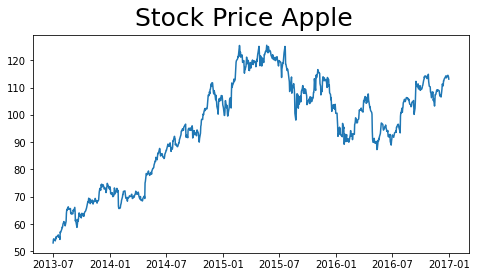

In [96]:
train = df.loc[:pd.Timestamp('2017-1-1 01:00:00')]
valid = df.loc[pd.Timestamp('2017-1-1 01:00:00'):]
# Create Figure
fig,ax = plt.subplots(figsize=(7.8,4))
fig.suptitle("Stock Price Apple",fontsize=25)
# Get data points
_ = train['AAPL']
x1 = _.index
y1 = _.values
sz = 4 # Window Size
# Plot
ax.plot(x1,y1)
plt.show()

Seems like its getting bigger. Trending.

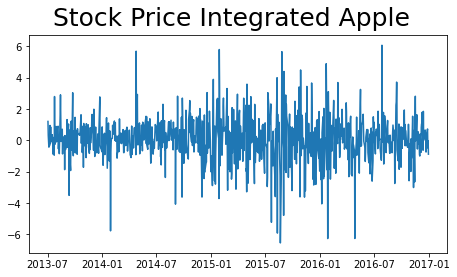

In [95]:
fig,ax = plt.subplots(figsize=(7.5,4))
fig.suptitle("Stock Price Integrated Apple",fontsize=25)

_t=_-_.shift(1)

x1 = _t[1:].index
y1 = _t[1:].values

sz = 4 # Window Size

# Plot
ax.plot(x1,y1)

plt.show()

Looks stochastic.

## Models

### ARIMA

ARIMA is a bit of a mouthful. Auto Regressive integrated moving average. ARIMA consists of three pieces. Lets start with the easiest the I. The plot on the left is the stock price of apple. The plot on the right is the integrated stock price of apple. Integrating the time series converted it from a trending timeseries into a stochastic one.

What did we actually do? The magic line 

`
_t=apple-apple.shift(1)
`

starts with the original series. Shifts its values one index location. And subtracts. The integrated plot is showing how much the price changed every day. Some days it goes up some days it goes down.

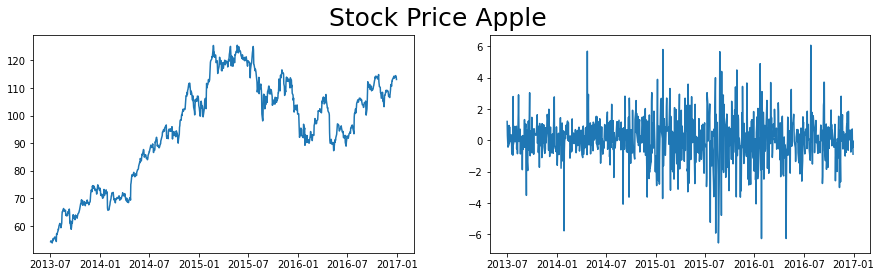

In [100]:
train = df.loc[:pd.Timestamp('2017-1-1 01:00:00')]
valid = df.loc[pd.Timestamp('2017-1-1 01:00:00'):]
# Create Figure
fig,ax = plt.subplots(nrows=1, ncols=2,figsize=(15,4))
fig.suptitle("Stock Price Apple",fontsize=25)
# Get data points
apple = train['AAPL']
x1 = apple[1:].index
y1 = apple[1:].values

# magic here
_t=apple-apple.shift(1)

y2 = _t[1:].values
sz = 4 # Window Size
# Plot
ax[0].plot(x1,y1)
ax[1].plot(x1,y2)
plt.show()

In [98]:
ax

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

### Kalman Filters

### Particle Filters

### RNN